In August 2015, the NYC Taxi and Limosine Commission released taxi data up through June 2015. 
This project analyzes some of that data, which is available at: 
    http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml

In [34]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams  

## Getting and Checking the Data

In [3]:
# Read in the data. We'll just start with the data for June, 2015, for  yellow cabs.
yellowDF = pd.read_csv('Data/yellow_tripdata_2015-06.csv')

In [8]:
print yellowDF.shape
print yellowDF.columns

(12332380, 18)
Index([u'VendorID', u'tpep_pickup_datetime', u'tpep_dropoff_datetime', u'passenger_count', u'trip_distance', u'pickup_longitude', u'pickup_latitude', u'RateCodeID', u'store_and_fwd_flag', u'dropoff_longitude', u'dropoff_latitude', u'payment_type', u'fare_amount', u'extra', u'mta_tax', u'tip_amount', u'tolls_amount', u'total_amount'], dtype='object')


Just the data in June gives us over 12 million records. We don't need all 18 columns, but we'll leave them for now. However, it might be nice to clean up the labels a bit. Then we'll need to clean the data to remove anything that won't help us, like NaNs, trips that take zero time, or those that clearly have incorrect entries.

In [10]:
labels = ['VendorID', 'pickup_time', 'dropoff_time', 'passenger_count', 'distance', 'pickup_long', 'pickup_lat', 
         'RateCodeID', 'flag', 'dropoff_long', 'dropoff_lat', 'payment_type', 'fare', 'extra', 'mta_tax',
         'tip', 'tolls', 'total']
yellowDF.columns = labels

In [33]:
# Let's get the summary of this dataframe to get an idea of what we have. 
# Then we'll just print out some of the values of interest.
summary = yellowDF.describe()

print 'Min distance:', summary.loc['min','distance'], '\t\t', 'Max distance:', summary.loc['max','distance']
print 'Min passenger count:', summary.loc['min', 'passenger_count'], '\t', \
        'Max passenger count:', summary.loc['max', 'passenger_count']
print 'Min longitude:', min(summary.loc['min', 'pickup_long'], summary.loc['min', 'dropoff_long']), '\t', \
        'Max longitude:', max(summary.loc['max', 'pickup_long'], summary.loc['max', 'dropoff_long'])
print 'Min latitude:', min(summary.loc['min', 'pickup_lat'], summary.loc['min', 'dropoff_lat']), '\t', \
        'Max latitude:', max(summary.loc['max', 'pickup_lat'], summary.loc['max', 'dropoff_lat'])
print 'Min total fare:', summary.loc['min', 'total'], '\t\t', 'Max total fare:', summary.loc['max', 'total']

Min distance: 0.0 		Max distance: 10083318.0
Min passenger count: 0.0 	Max passenger count: 9.0
Min longitude: -759.233337402 	Max longitude: 149.028533936
Min latitude: -67.1369628906 	Max latitude: 483.450012207
Min total fare: -300.0 		Max total fare: 335414.49


Uh oh. Looks like there are some wacky values here. A longitude of -759.23 goes around the Earth twice, then ends up somewhere in the Atlantic Ocean. In the next section, we'll clean up the data so we remove the odd entries. 

## Cleaning the Data

Here's what we'd like to get rid of:
* Trips that take zero time or have zero distance
* Trips that take many hours or have distances more than 100 miles
* Trips that start or end way outside of New York City
* Fares that are below zero, or far above anything reasonable

In [35]:
# Remove any rows that include NaNs.
yellowDF = yellowDF.dropna()

In [44]:
# df = df[df.name != 'Tina']
yellowDF = yellowDF[(yellowDF.distance > 0) & (yellowDF.distance < 100)]

In [45]:
yellowDF.shape

(12251219, 18)

In [47]:
yellowDF = yellowDF[(yellowDF.pickup_long > -74.5) & (yellowDF.pickup_long < -73.5) & \
                   (yellowDF.dropoff_long > -74.5) & (yellowDF.dropoff_long < -73.5) & \
                   (yellowDF.pickup_lat > 40.5) & (yellowDF.pickup_lat < 41.0) & \
                   (yellowDF.dropoff_lat > 40.5) & (yellowDF.dropoff_lat < 41.0)]

In [48]:
yellowDF.shape

(12079453, 18)

At this point, we've removed 252,927 records, or about 2%. Let's keep cleaning.

In [60]:
yellowDF = yellowDF[(yellowDF.total > 0) & (yellowDF.total < 200)]

In [61]:
summary2 = yellowDF.describe()
summary2

,VendorID,passenger_count,distance,pickup_long,pickup_lat,RateCodeID,dropoff_long,dropoff_lat,payment_type,fare,extra,mta_tax,tip,tolls,total
count,12075692.000000,12075692.000000,12075692.000000,12075692.000000,12075692.000000,12075692.000000,12075692.000000,12075692.000000,12075692.000000,12075692.000000,12075692.000000,12075692.000000,12075692.000000,12075692.000000,12075692.00000
mean,1.527624,1.686290,3.027872,-73.973596,40.750751,1.032787,-73.973588,40.751514,1.376134,13.087998,0.324227,0.498601,1.726669,0.313410,16.25107
std,0.499236,1.339659,3.642399,0.038339,0.027884,0.423415,0.035750,0.031745,0.495316,10.522655,0.364926,0.026457,2.432337,1.407252,12.95993
min,1.000000,0.000000,0.010000,-74.455566,40.501221,1.000000,-74.499062,40.501045,1.000000,0.000000,-5.500000,0.000000,0.000000,0.000000,0.01000
25%,1.000000,1.000000,1.040000,-73.992058,40.737331,1.000000,-73.991417,40.736012,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,8.76000
50%,2.000000,1.000000,1.770000,-73.981827,40.753902,1.000000,-73.979973,40.754341,1.000000,9.500000,0.000000,0.500000,1.200000,0.000000,12.30000
75%,2.000000,2.000000,3.260000,-73.967514,40.768234,1.000000,-73.963608,40.769131,2.000000,15.000000,0.500000,0.500000,2.360000,0.000000,18.30000
max,2.000000,9.000000,97.800000,-73.500847,40.999134,99.000000,-73.500061,40.999596,5.000000,195.000000,40.050000,4.800000,180.000000,150.000000,199.88000


In [62]:
yellowDF.shape

(12075692, 18)

In [71]:
pickup = yellowDF.loc[:, ['pickup_long', 'pickup_lat']]

In [80]:
log_vals = np.zeros((4000,4000))


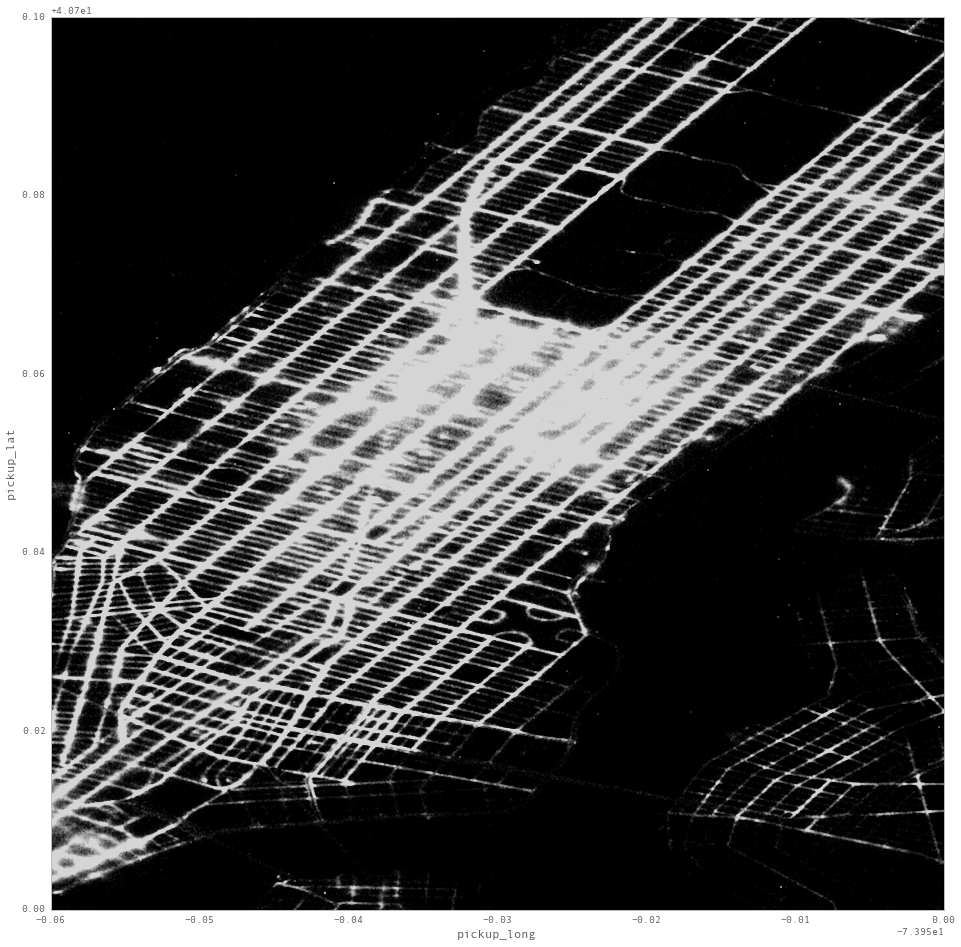

In [79]:
# Some of this code was borrowed from Daniel Forsyth's code at http://www.danielforsyth.me/mapping-nyc-taxi-data/ 
# and modified.
# Here's the comment from Hacker News user 'eck' on how he did it:
# "The process of making it was quite simple. I zeroed a 2d array of integers, then took all the pickup/dropoff 
# points and incremented the nearest cell. The pixel values are based on the logarithm of the counts, 
# since otherwise everything outside midtown would be pretty much black."
%matplotlib inline

# This creates a figure that is 4000 x 4000 pixels
rcParams['figure.figsize'] = (16, 16) # Figure size in inches
rcParams['figure.dpi'] = 250

# P = pickup.plot(kind='scatter', x='pickup_long', y='pickup_lat', color='white',
#               xlim=(-74.1,-73.75), ylim=(40.6, 40.9), s=.01, alpha=.5)

# Close up of downtown
P = pickup.plot(kind='scatter', x='pickup_long', y='pickup_lat', color='white',
              xlim=(-74.01,-73.95), ylim=(40.7, 40.8), s=.01, alpha=.5)

P.set_axis_bgcolor('black') #Background Color